In [2]:
import sys
sys.path.append("/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/geomeppy/_scripts")

from copy import deepcopy
from pprint import pprint

import numpy as np
import plotly.express as px
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt

from aenum import Enum
from munch import Munch
from ladybug.dt import Time

from case_edits.ezcase import EzCase
from recipes.exp_01 import input, ns_axis
from outputs.variables import OutputVars as ov
from analysis.bar_plot import BarPlotAnalysis

# from helpers.dynamic_outputs import DynamicOutputVariables

In [3]:
qois = [ov.inside_face_convection_heat_gain, ov.inside_face_net_surface_thermal_radiation_heat_gain, ov.average_face_conduction_heat_transfer]
qoi_names = ["conv", "rad", "cond"]

#  ov.inside_face_solar_radiation_heat_gain

In [31]:
ov.inside_face_net_surface_thermal_radiation_heat_gain

<OutputVars.inside_face_net_surface_thermal_radiation_heat_gain: 'Surface Inside Face Net Surface Thermal Radiation Heat Gain Rate per Area'>

In [4]:
input.output_variables.extend(qois)

input2 = deepcopy(input)
input2.case_name = "tests/test18_ns"
ez2 = EzCase(ns_axis(input2), RUN_CASE=False)

tests/test18_ns
Added 4 walls 
Added 6 walls 
Added 4 walls 
Added 4 walls 
Added 6 walls 
Added 4 walls 
out.idf exists
IDF has changed: True
looking for sql


In [5]:
bp = BarPlotAnalysis(ez2, qois, plot_type=1, qoi_names=qoi_names)
bp.run()

In [6]:
bp.df

,room,qoi,time,value
0,B_01,conv,2017-07-01 00:00:00,-34.859784
1,B_01,conv,2017-07-01 00:15:00,-38.995429
2,B_01,conv,2017-07-01 00:30:00,-47.385849
3,B_01,conv,2017-07-01 00:45:00,-52.867544
4,B_01,conv,2017-07-01 01:00:00,-61.938773
...,...,...,...,...
1723,B_06,cond,2017-07-01 22:45:00,-37.691512
1724,B_06,cond,2017-07-01 23:00:00,-36.292972
1725,B_06,cond,2017-07-01 23:15:00,-35.049412
1726,B_06,cond,2017-07-01 23:30:00,-33.921440


In [17]:
sns.set_theme()

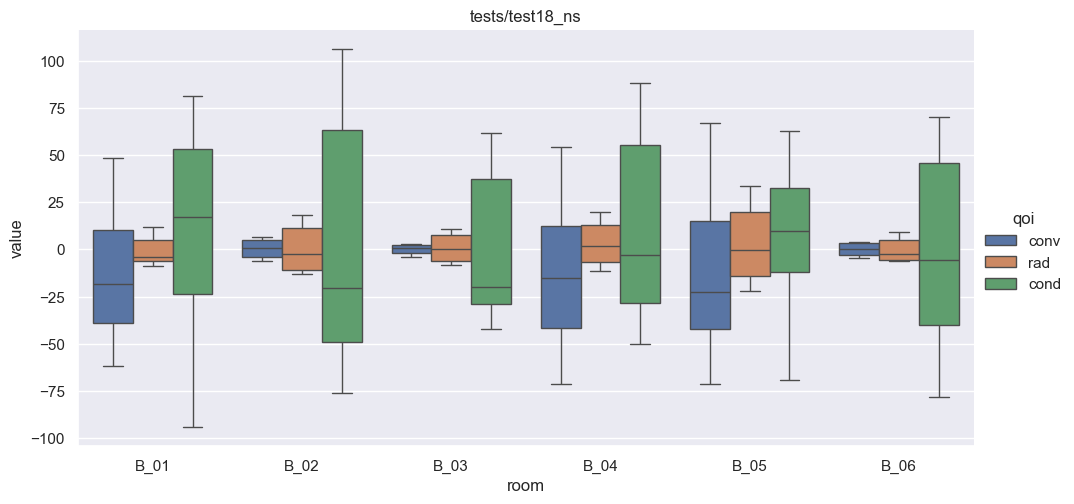

In [30]:
f = sns.catplot(
    data=bp.df, x="room", y="value", hue="qoi", kind="box", height=5, aspect=2
).set(title=bp.case_name)



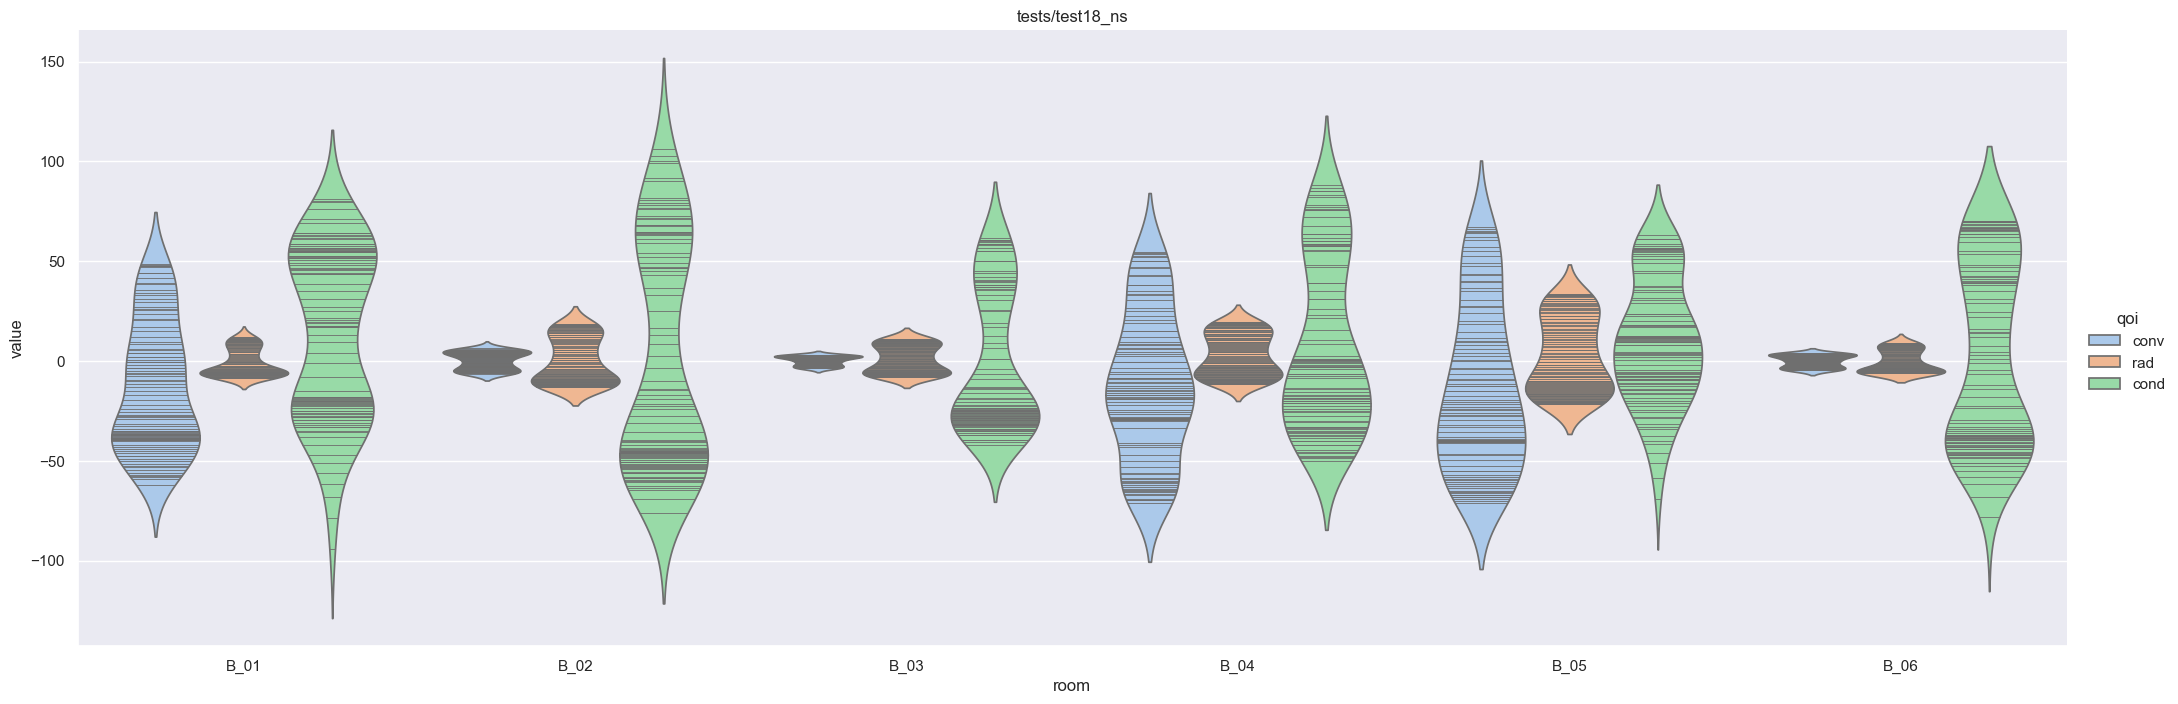

In [69]:
f = sns.catplot(
    data=bp.df, x="room", y="value", hue="qoi", kind="violin", height=7, aspect=3,  palette="pastel", density_norm="width", inner="stick"
).set(title=bp.case_name)

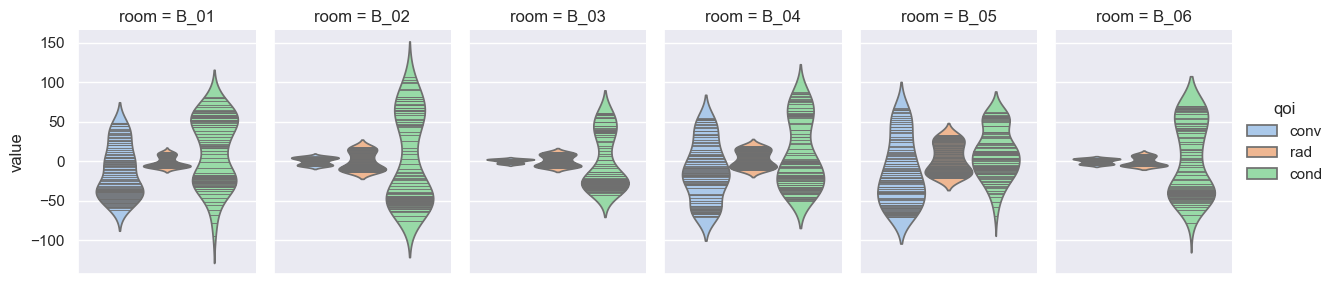

In [85]:
f = sns.catplot(
    data=bp.df,  y="value", hue="qoi", kind="violin", height=3,  aspect=0.7, palette="pastel", density_norm="width", col="room", inner="stick"
)

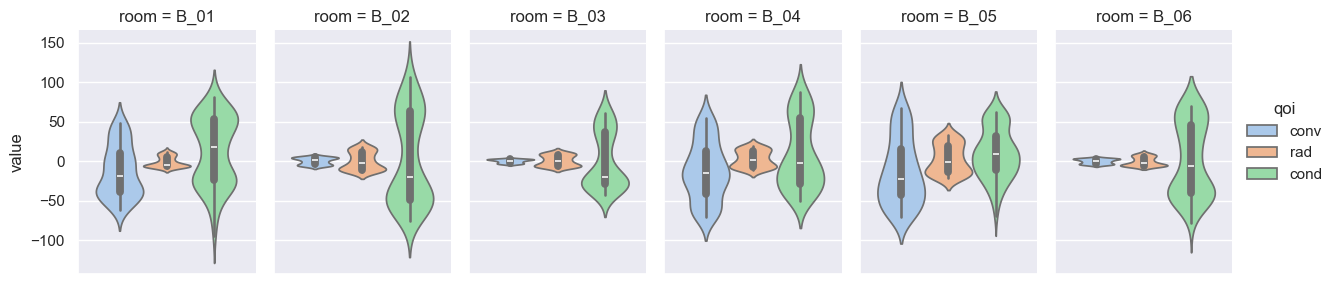

In [84]:
f = sns.catplot(
    data=bp.df,  y="value", hue="qoi", kind="violin", height=3,  aspect=0.7, palette="pastel", density_norm="width", col="room"
)

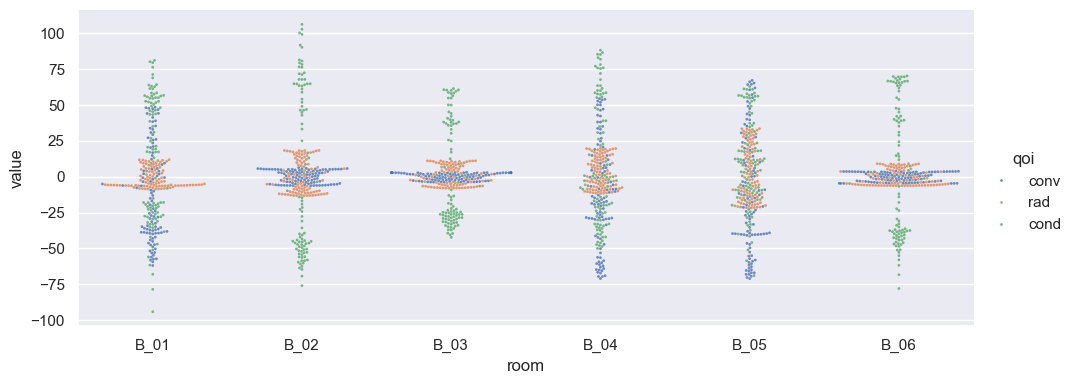

In [41]:
sns.catplot(
    height=4, data=bp.df, x="room", y="value", hue="qoi", alpha=0.8, kind="swarm", aspect=2.5, size=2)

In [6]:
fig = px.bar(bp.df, x="room", y="value", color="qoi", title=f"{ez2.case.case_name} at {bp.time}")
fig.show()

In [6]:
bp.curr_collection

[15 Minute Continuous Data Collection
 7/1 to 7/1 between 0 and 23 @4
 Energy Flux (W/m2)
 ...96 values...,
 15 Minute Continuous Data Collection
 7/1 to 7/1 between 0 and 23 @4
 Energy Flux (W/m2)
 ...96 values...,
 15 Minute Continuous Data Collection
 7/1 to 7/1 between 0 and 23 @4
 Energy Flux (W/m2)
 ...96 values...,
 15 Minute Continuous Data Collection
 7/1 to 7/1 between 0 and 23 @4
 Energy Flux (W/m2)
 ...96 values...,
 15 Minute Continuous Data Collection
 7/1 to 7/1 between 0 and 23 @4
 Energy Flux (W/m2)
 ...96 values...,
 15 Minute Continuous Data Collection
 7/1 to 7/1 between 0 and 23 @4
 Energy Flux (W/m2)
 ...96 values...,
 15 Minute Continuous Data Collection
 7/1 to 7/1 between 0 and 23 @4
 Energy Flux (W/m2)
 ...96 values...,
 15 Minute Continuous Data Collection
 7/1 to 7/1 between 0 and 23 @4
 Energy Flux (W/m2)
 ...96 values...,
 15 Minute Continuous Data Collection
 7/1 to 7/1 between 0 and 23 @4
 Energy Flux (W/m2)
 ...96 values...,
 15 Minute Continuous Data C

In [ ]:
datetimes = list(val2[0].datetimes)
i = filter(lambda x: x.time == Time(12,0), datetimes)
time_ix = datetimes.index(next(i))
time_ix

In [8]:
ez2.plt.get_collection_for_variable(ov.inside_face_solar_radiation_heat_gain)
ez2.plt.filter_collections()
val1 = ez2.plt.filtered_collection

In [11]:
ez2.plt.get_collection_for_variable(ov.inside_face_convection_heat_gain)
ez2.plt.filter_collections()
val2 = ez2.plt.filtered_collection

In [24]:
curr_zone = ez2.case.geometry.zones["B_01"]
surf_values = []
for surface in val2:
    if curr_zone.name.upper() in surface.header.metadata["Surface"]:
        print(surface.header.metadata["Surface"])
        surf_values.append(np.array(surface.values))

block_values = sum(surf_values)
block_values

BLOCK 01 STOREY 0 WALL 0002
BLOCK 01 STOREY 0 WALL 0003
BLOCK 01 STOREY 0 WALL 0001_1
BLOCK 01 STOREY 0 WALL 0004_1
BLOCK 01 STOREY 0 FLOOR 0001
BLOCK 01 STOREY 0 ROOF 0001
BLOCK 01 STOREY 0 WALL 0002 DOOR


In [38]:
list(val2[0].datetimes)[1].time == Time(0, 15)

True

48

In [53]:
block_values[time_ix]

np.float64(35.448165803371836)